##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Cifar-3 Image classification Challenge
Adapted from official tensorflow image classification tutorial: https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb

## Imports and Constants

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import constraints

In [3]:
with np.load('prediction-challenge-02-data.npz') as fh:
    challenge_x_train = fh['x_train']
    challenge_y_train = fh['y_train']
    challenge_x_test = fh['x_test']

# TRAINING DATA: INPUT (x) AND OUTPUT (y)
# 1. INDEX: IMAGE SERIAL NUMBER (6000)
# 2/3. INDEX: PIXEL VALUE (32 x 32)
# 4. INDEX: COLOR CHANNELS (3)
print(f"Training data shape: {challenge_x_train.shape}, type: {challenge_x_train.dtype}")
print(f"Training labels shape: {challenge_y_train.shape}, type: {challenge_y_train.dtype}")

# TEST DATA: INPUT (x) ONLY
print(f"Test data shape: {challenge_x_test.shape}, type: {challenge_x_test.dtype}")

Training data shape: (3000, 32, 32, 3), type: float32
Training labels shape: (3000,), type: float64
Test data shape: (300, 32, 32, 3), type: float32


In [4]:
BATCH_SIZE = 32
IMG_HEIGHT = challenge_x_train.shape[1]
IMG_WIDTH = challenge_x_train.shape[2]
VAL_SIZE = 0.2
TEST_SIZE = 0.1
CLASSES = {0:"cat",1:"dog",2:"frog"}
NUM_CLASSES = len(CLASSES)

## Visualize Examples

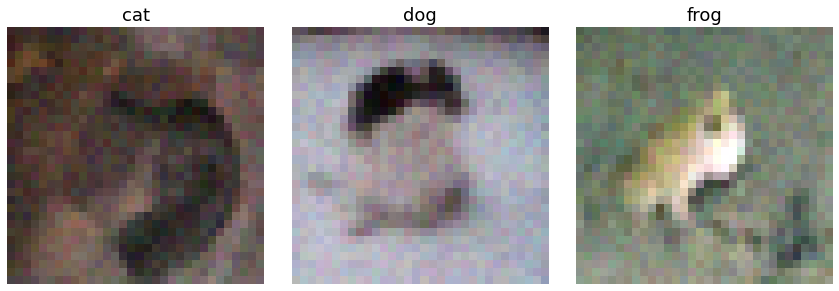

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=len(CLASSES), figsize=(4*len(CLASSES), 4))

for class_id in CLASSES:
    axes[class_id].set_title(CLASSES[class_id], size=18)
    axes[class_id].imshow(challenge_x_train[np.where(challenge_y_train == class_id)[0][0]])
    axes[class_id].axis("off")
fig.tight_layout()
plt.show()

## Training - Validation - Test - Split

In [6]:
x, x_test, y, y_test = train_test_split(challenge_x_train,challenge_y_train, test_size=TEST_SIZE,shuffle=True,random_state=71,stratify=challenge_y_train)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=VAL_SIZE, shuffle=True, stratify=y)

x = np.concatenate((x_train, x_val))
y = np.concatenate((y_train, y_val))

## Data augmentation

In [7]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0.7,1.0),
    shear_range=10,
    zoom_range=(0.8,1.0),
    horizontal_flip=True,
    rotation_range=90., 
    validation_split=VAL_SIZE)

img_gen.fit(x)
train_ds = img_gen.flow(x,y,batch_size=BATCH_SIZE,shuffle=True,seed=28, subset="training")
val_ds = img_gen.flow(x,y,batch_size=BATCH_SIZE,shuffle=True,seed=28, subset="validation")

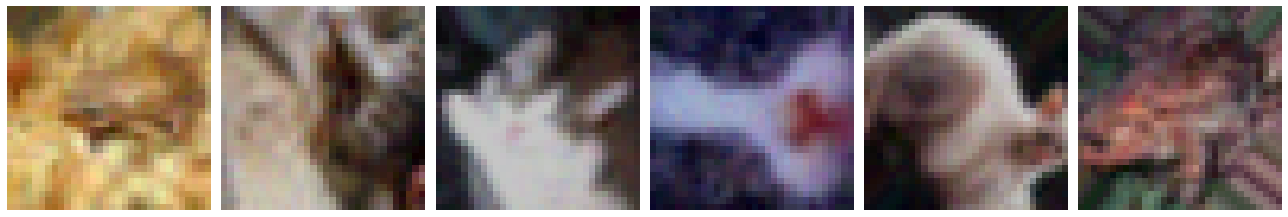

In [8]:
fig, rows =plt.subplots(nrows=1, ncols=6, figsize=(18,18))
for row in rows:
    row.imshow(train_ds.next()[0][10].astype(np.uint8))
    row.axis("off")
    
plt.tight_layout()
plt.show()

## Model Definition

In [12]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, None, None, 16)    448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, None, None, 16)    0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 32)    4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, None, None, 32)    0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, None, None, 64)    0         
_________________________________________________________________
dropout_1 (Dropout)          (None, None, None, 64)   

## Training

In [15]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
    batch_size=BATCH_SIZE,
  epochs=epochs
)

Epoch 1/50
68/68 [==============================] - 6s 81ms/step - loss: 4.2457 - accuracy: 0.3991 - val_loss: 1.0692 - val_accuracy: 0.4370
Epoch 2/50
68/68 [==============================] - 5s 69ms/step - loss: 1.0510 - accuracy: 0.4597 - val_loss: 0.9957 - val_accuracy: 0.4944
Epoch 3/50
68/68 [==============================] - 5s 71ms/step - loss: 1.0048 - accuracy: 0.4931 - val_loss: 0.9871 - val_accuracy: 0.4852
Epoch 4/50
68/68 [==============================] - 5s 74ms/step - loss: 0.9921 - accuracy: 0.4968 - val_loss: 0.9776 - val_accuracy: 0.4870
Epoch 5/50
68/68 [==============================] - 5s 71ms/step - loss: 0.9692 - accuracy: 0.5176 - val_loss: 0.9419 - val_accuracy: 0.5241
Epoch 6/50
68/68 [==============================] - 5s 71ms/step - loss: 0.9554 - accuracy: 0.5231 - val_loss: 0.9655 - val_accuracy: 0.5259
Epoch 7/50
68/68 [==============================] - 5s 73ms/step - loss: 0.9325 - accuracy: 0.5292 - val_loss: 0.9181 - val_accuracy: 0.5463
Epoch 8/50
68

## Visualize Metrics

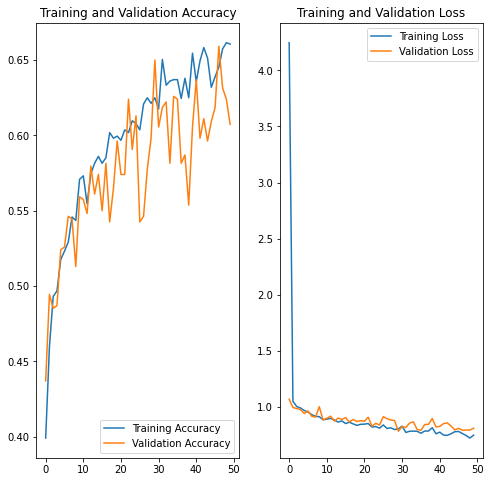

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Prediction with Test Time Augmentation 

Adapted from a blogpost: https://towardsdatascience.com/test-time-augmentation-tta-and-how-to-perform-it-with-keras-4ac19b67fb4d 

In [17]:
tta_steps = 10
predictions = []

for i in range(tta_steps):
    preds = model.predict(img_gen.flow(x_test, batch_size=BATCH_SIZE, shuffle=False))
    scores = tf.nn.softmax(preds)
    predictions.append(scores)

pred = np.mean(predictions, axis=0)

print(f"Accuracy on custom test set: {np.mean(np.equal(y_test, np.argmax(pred, axis=1)))}")

Accuracy on custom test set: 0.6466666666666666


## Visualize the trained Filters (First Conv-Layer)

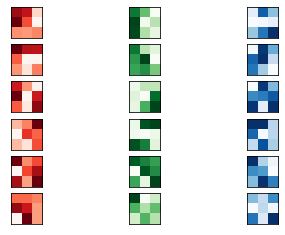

In [29]:
filters, biases = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters, position = 6, 1

colors=['Reds','Greens','Blues']

for i in range(n_filters):
    f = filters[:, :, :, i]
    
    for channel,color in enumerate(colors):
        ax = plt.subplot(n_filters, 3, position)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, channel], cmap=color)
        position += 1

plt.show()

## Visualize feature maps of first Convolutional layer

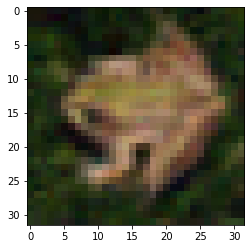

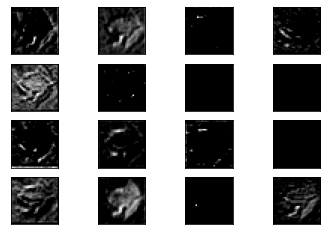

In [39]:
from keras.models import Model

temp_model = Model(inputs=model.inputs, outputs=model.layers[0].output)

img=train_ds.next()[0][10]
plt.imshow(img.astype(np.uint8))
plt.show()

feature_maps=temp_model.predict(img.reshape(1,32,32,3))

#plot all feature maps in 4*4 square

square = 4
position = 1
for _ in range(square):
    for _ in range(square):
        ax = plt.subplot(square, square, position)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, position-1], cmap='gray')
        position += 1

plt.show()

## Continue Training with whole Dataset

In [17]:
whole_train_ds = img_gen.flow(challenge_x_train,challenge_y_train,batch_size=BATCH_SIZE,shuffle=True, subset="training")
whole_val_ds = img_gen.flow(challenge_x_train,challenge_y_train,batch_size=BATCH_SIZE,shuffle=True, subset="validation")
epochs = 50
history = model.fit(
  whole_train_ds,
  validation_data=whole_val_ds,
    batch_size=BATCH_SIZE,
  epochs=epochs
)

Epoch 1/50
75/75 [==============================] - 2s 25ms/step - loss: 0.7216 - accuracy: 0.6771 - val_loss: 0.8098 - val_accuracy: 0.6117
Epoch 2/50
75/75 [==============================] - 2s 24ms/step - loss: 0.7433 - accuracy: 0.6746 - val_loss: 0.7022 - val_accuracy: 0.6900
Epoch 3/50
75/75 [==============================] - 2s 24ms/step - loss: 0.7235 - accuracy: 0.6712 - val_loss: 0.6905 - val_accuracy: 0.6917
Epoch 4/50
75/75 [==============================] - 2s 24ms/step - loss: 0.7007 - accuracy: 0.6883 - val_loss: 0.6538 - val_accuracy: 0.7267
Epoch 5/50
75/75 [==============================] - 2s 23ms/step - loss: 0.7065 - accuracy: 0.6921 - val_loss: 0.6499 - val_accuracy: 0.7183
Epoch 6/50
75/75 [==============================] - 2s 24ms/step - loss: 0.6960 - accuracy: 0.7008 - val_loss: 0.7058 - val_accuracy: 0.6583
Epoch 7/50
75/75 [==============================] - 2s 24ms/step - loss: 0.6642 - accuracy: 0.7067 - val_loss: 0.6401 - val_accuracy: 0.7300
Epoch 8/50
75

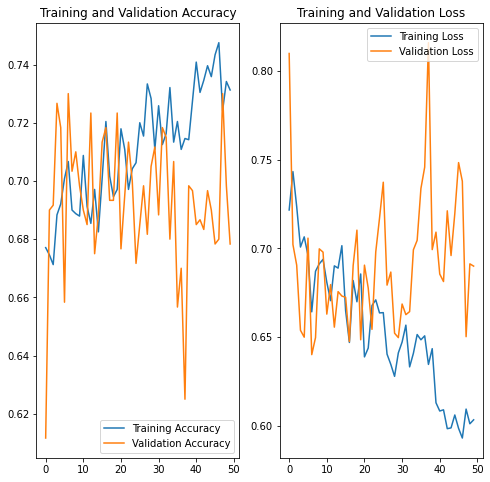

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Challenge Prediction with Test Time Augmentation

In [19]:
tta_steps = 10
predictions = []

for i in range(tta_steps):
    preds = model.predict(img_gen.flow(challenge_x_test, batch_size=BATCH_SIZE, shuffle=False))
    scores = tf.nn.softmax(preds)
    predictions.append(scores)

pred = np.mean(predictions, axis=0)
prediction = np.argmax(pred,axis=1)

# MAKE SURE THAT YOU HAVE THE RIGHT FORMAT
assert prediction.ndim == 1
assert prediction.shape[0] == 300

# AND SAVE EXACTLY AS SHOWN BELOW
np.save('prediction.npy', prediction.astype(int))

# MAKE SURE THAT THE FILE HAS THE CORRECT FORMAT
def validate_prediction_format():
    loaded = np.load('prediction.npy')
    assert loaded.shape == (300, )
    assert loaded.dtype == int
    assert (loaded <= 2).all()
    assert (loaded >= 0).all()
    
validate_prediction_format()

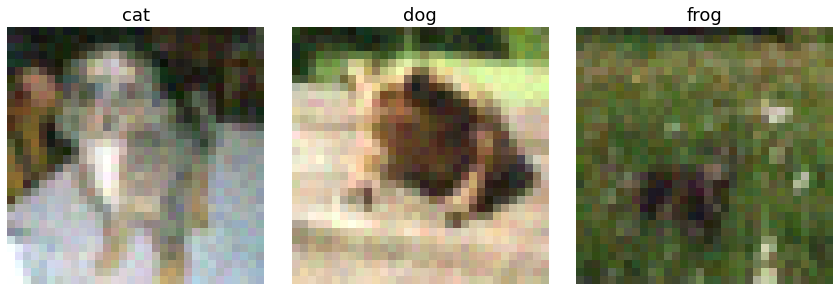

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=len(CLASSES), figsize=(4*len(CLASSES), 4))

for class_id in CLASSES:
    axes[class_id].set_title(CLASSES[class_id], size=18)
    axes[class_id].imshow(challenge_x_test[np.where(prediction == class_id)[0][0]])
    axes[class_id].axis("off")
fig.tight_layout()
plt.show()